# Block [1-3]
First, let's import our dataset that we saved in previous step which contains Binance OHLC data plus some custom indicators we've added.

In [1]:
#Importing neccassary libraries for this experimnet.
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read csv
source = pd.read_csv('labeled_corrected.csv')
df = source.copy()
#set date and index
df['Date'] = pd.to_datetime(source['Date'], format='%Y-%m-%d %H:%M:%S')
df.set_index('Date', inplace=True)

In [3]:
df

,Open,High,Low,Close,Volume,Numtr,sma9,sma20,sma50,sma200,true_range,atr14,rsi,candle_14,target_long,target_short,long_labeled,short_labeled
Date,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3701.23,3713.00,3689.88,3700.31,686.367415,5534.0,3703.870000,3730.2370,3747.9822,3788.18005,23.12,39.537857,41.701622,-2.285828,0,0,NaN,NaN
2019-01-01 01:00:00,3700.20,3702.73,3684.22,3689.69,613.539120,5086.0,3698.705556,3727.3490,3747.8696,3786.94660,18.51,35.044286,39.464378,-2.873269,0,0,NaN,NaN
2019-01-01 02:00:00,3689.67,3695.95,3675.04,3690.00,895.302181,6391.0,3693.560000,3723.9765,3747.7436,3785.63015,20.91,34.936429,39.566298,-2.644464,0,0,NaN,NaN
2019-01-01 03:00:00,3690.00,3699.77,3685.78,3693.13,796.714817,5709.0,3688.183333,3720.9105,3747.4602,3784.44710,13.99,34.937857,40.652770,-2.232002,0,0,NaN,NaN
2019-01-01 04:00:00,3692.32,3720.00,3685.94,3692.71,1317.452909,7908.0,3688.765556,3717.9355,3746.9590,3783.21580,34.06,33.369286,40.547430,-2.044716,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,43532.32,43772.47,43100.00,43435.08,1425.997980,55774.0,43334.913333,43288.4545,42410.9756,42886.52925,672.47,525.530000,57.205175,37.676411,1,0,43435.08,NaN
2021-09-30 21:00:00,43436.56,43799.93,43375.10,43754.00,920.783630,29560.0,43372.076667,43327.8840,42454.0158,42893.43780,424.83,539.244286,61.013857,57.659524,1,0,43754.00,NaN
2021-09-30 22:00:00,43754.00,43915.89,43631.14,43741.70,1044.987890,39705.0,43445.402222,43344.5775,42493.4348,42900.56120,284.75,512.302143,60.789149,52.662415,1,0,43741.70,NaN


# Block [4-14]
Visualizing Data to see if they have normal distribution and select suitable features

In [4]:
# function to plot histogram
def plt_hist(x,n_bins=100):
    plt.hist(x, bins=n_bins)

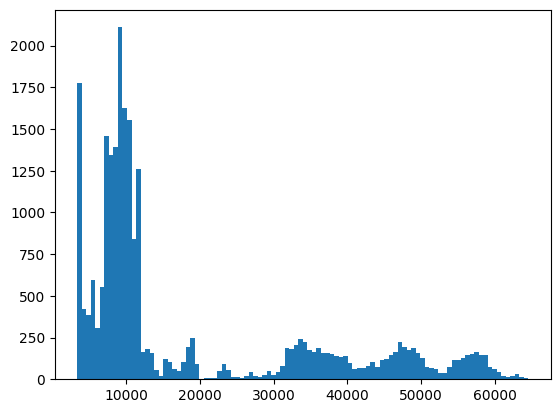

In [5]:
# Close histogram
plt_hist(df['Close'])

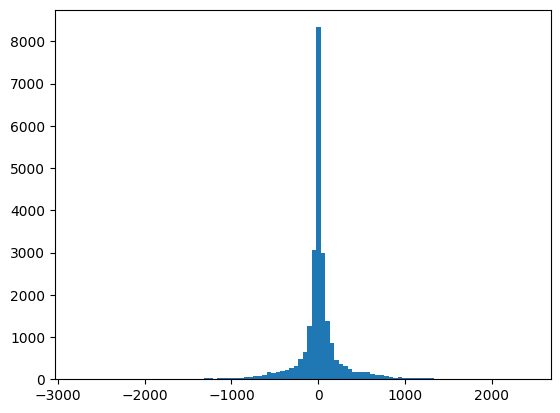

In [6]:
#Calculate diff SMA9 and SMA20
df['diff_sma'] = df.sma9 - df.sma20
#diff SMA9 and SMA20 histogram
plt_hist(df['diff_sma'])

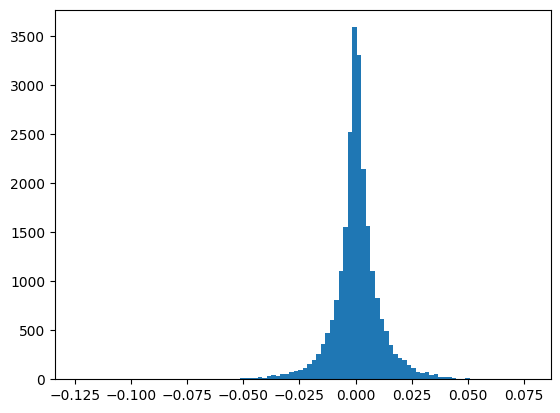

In [7]:
#Normalize the variance to -1 and 1
df['diff_sma9_sma20'] = df.diff_sma / df.sma20
plt_hist(df['diff_sma9_sma20'])

In [8]:
#create a new dataset
expo = pd.DataFrame()

#calculate SMA200 of 4h timeframe by using resample function
df_4h = df.resample('4H').agg({'Close' : 'last'})
df_4h['sma200_4h'] = df_4h.Close.rolling(window=200).mean()
h_df = df_4h.resample('H').ffill()

#copy what we need from old dataframe for building features
expo['close'] = df.Close
expo['open'] = df.Open
expo['high'] = df.High
expo['low'] = df.Low
expo['volume'] = df.Volume
expo['sma9'] = df.sma9
expo['sma20'] = df.sma20
expo['sma200'] = df.sma200
expo['sma200_4h'] = h_df.sma200_4h

#Create features
expo['diff_sma9'] = (expo.close - expo.sma9) / expo.sma9
expo['diff_sma20'] = (expo.close - expo.sma20) / expo.sma20
expo['diff_sma200'] = (expo.close - expo.sma200) / expo.sma200
expo['diff_sma200_4h'] = (expo.close - expo.sma200_4h) / expo.sma200_4h
expo['diff_sma9_sma20'] = (expo.sma9 - expo.sma20) / expo.sma20

In [9]:
expo

,close,open,high,low,volume,sma9,sma20,sma200,sma200_4h,diff_sma9,diff_sma20,diff_sma200,diff_sma200_4h,diff_sma9_sma20
Date,,,,,,,,,,,,,,
2019-01-01 00:00:00,3700.31,3701.23,3713.00,3689.88,686.367415,3703.870000,3730.2370,3788.18005,NaN,-0.000961,-0.008023,-0.023196,NaN,-0.007068
2019-01-01 01:00:00,3689.69,3700.20,3702.73,3684.22,613.539120,3698.705556,3727.3490,3786.94660,NaN,-0.002437,-0.010103,-0.025682,NaN,-0.007685
2019-01-01 02:00:00,3690.00,3689.67,3695.95,3675.04,895.302181,3693.560000,3723.9765,3785.63015,NaN,-0.000964,-0.009124,-0.025261,NaN,-0.008168
2019-01-01 03:00:00,3693.13,3690.00,3699.77,3685.78,796.714817,3688.183333,3720.9105,3784.44710,NaN,0.001341,-0.007466,-0.024130,NaN,-0.008795
2019-01-01 04:00:00,3692.71,3692.32,3720.00,3685.94,1317.452909,3688.765556,3717.9355,3783.21580,NaN,0.001069,-0.006785,-0.023923,NaN,-0.007846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-30 20:00:00,43435.08,43532.32,43772.47,43100.00,1425.997980,43334.913333,43288.4545,42886.52925,46219.07115,0.002311,0.003387,0.012791,-0.060235,0.001073
2021-09-30 21:00:00,43754.00,43436.56,43799.93,43375.10,920.783630,43372.076667,43327.8840,42893.43780,46219.07115,0.008806,0.009835,0.020063,-0.053335,0.001020
2021-09-30 22:00:00,43741.70,43754.00,43915.89,43631.14,1044.987890,43445.402222,43344.5775,42900.56120,46219.07115,0.006820,0.009162,0.019607,-0.053601,0.002326


We visualize every feature we build to see they have normal distribution. We can also use "describe" function to have a sense of the range that feature has.

count    24097.000000
mean         0.000442
std          0.012510
min         -0.242689
25%         -0.003895
50%          0.000453
75%          0.004904
max          0.136940
Name: diff_sma9, dtype: float64


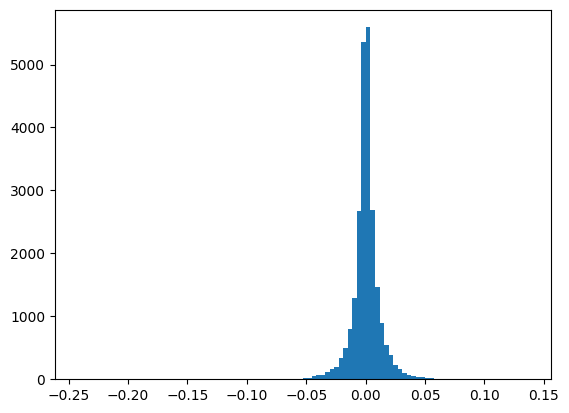

In [10]:
plt_hist(expo['diff_sma9'])
print(expo.diff_sma9.describe())

count    24097.000000
mean         0.001059
std          0.019576
min         -0.317961
25%         -0.006182
50%          0.000945
75%          0.008672
max          0.223169
Name: diff_sma20, dtype: float64


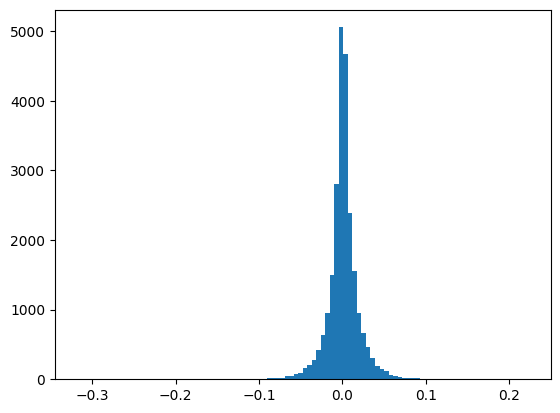

In [11]:
plt_hist(expo['diff_sma20'])
print(expo.diff_sma20.describe())

count    24097.000000
mean         0.011111
std          0.063956
min         -0.497430
25%         -0.020993
50%          0.007752
75%          0.043898
max          0.332861
Name: diff_sma200, dtype: float64


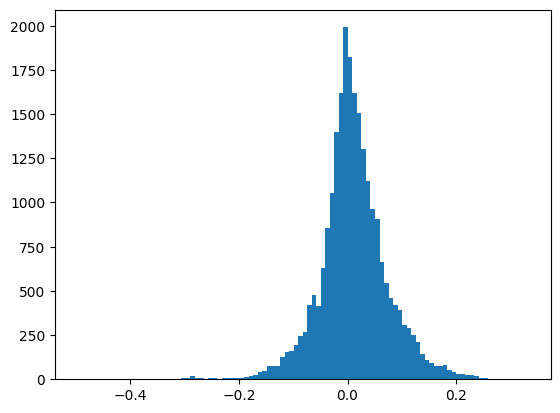

In [12]:
plt_hist(expo['diff_sma200'])
print(expo.diff_sma200.describe())

count    23301.000000
mean         0.048307
std          0.136964
min         -0.550935
25%         -0.034164
50%          0.036756
75%          0.130330
max          0.659944
Name: diff_sma200_4h, dtype: float64


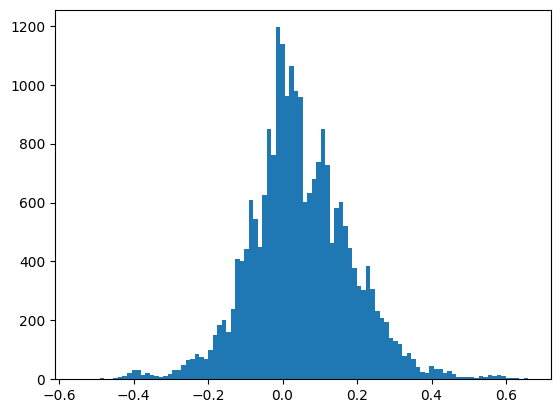

In [13]:
plt_hist(expo['diff_sma200_4h'])
print(expo.diff_sma200_4h.describe())

In [14]:
#Coply labels
expo['target_long'] = df['target_long'] 
expo['target_short'] = df['target_short']

# Block [15-16]
Ploting heatmap to see which features are correlated and avoid using them.

In [15]:
# make a dataset for plots
data = []
plot_df = pd.DataFrame(data)
plot_df['diff_sma9_sma20'] = expo.diff_sma9_sma20
plot_df['diff_sma9'] = expo.diff_sma9
plot_df['diff_sma20'] = expo.diff_sma20
plot_df['diff_sma200'] = expo.diff_sma200
plot_df['diff_sma200_4h'] = expo.diff_sma200_4h
plot_df

,diff_sma9_sma20,diff_sma9,diff_sma20,diff_sma200,diff_sma200_4h
Date,,,,,
2019-01-01 00:00:00,-0.007068,-0.000961,-0.008023,-0.023196,NaN
2019-01-01 01:00:00,-0.007685,-0.002437,-0.010103,-0.025682,NaN
2019-01-01 02:00:00,-0.008168,-0.000964,-0.009124,-0.025261,NaN
2019-01-01 03:00:00,-0.008795,0.001341,-0.007466,-0.024130,NaN
2019-01-01 04:00:00,-0.007846,0.001069,-0.006785,-0.023923,NaN
...,...,...,...,...,...
2021-09-30 20:00:00,0.001073,0.002311,0.003387,0.012791,-0.060235
2021-09-30 21:00:00,0.001020,0.008806,0.009835,0.020063,-0.053335
2021-09-30 22:00:00,0.002326,0.006820,0.009162,0.019607,-0.053601


<Axes: >

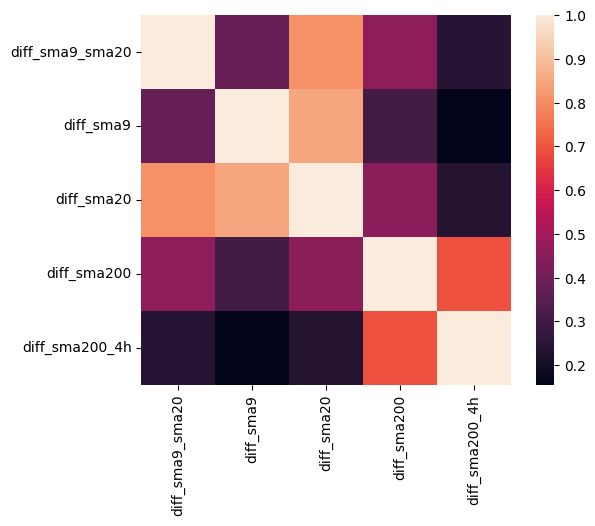

In [16]:
#plot Correlation
sns.heatmap(plot_df.corr() , square=True)

# Block [17-22]
Visualizing feature relative to labels by pairplot and save train and validation files for further usage.

In [17]:
#Adding target long to plot for pairplot visualization
plot_df['target'] = np.where(expo.target_long == 1, 1, 0)
plot_df

,diff_sma9_sma20,diff_sma9,diff_sma20,diff_sma200,diff_sma200_4h,target
Date,,,,,,
2019-01-01 00:00:00,-0.007068,-0.000961,-0.008023,-0.023196,NaN,0
2019-01-01 01:00:00,-0.007685,-0.002437,-0.010103,-0.025682,NaN,0
2019-01-01 02:00:00,-0.008168,-0.000964,-0.009124,-0.025261,NaN,0
2019-01-01 03:00:00,-0.008795,0.001341,-0.007466,-0.024130,NaN,0
2019-01-01 04:00:00,-0.007846,0.001069,-0.006785,-0.023923,NaN,0
...,...,...,...,...,...,...
2021-09-30 20:00:00,0.001073,0.002311,0.003387,0.012791,-0.060235,1
2021-09-30 21:00:00,0.001020,0.008806,0.009835,0.020063,-0.053335,1
2021-09-30 22:00:00,0.002326,0.006820,0.009162,0.019607,-0.053601,1


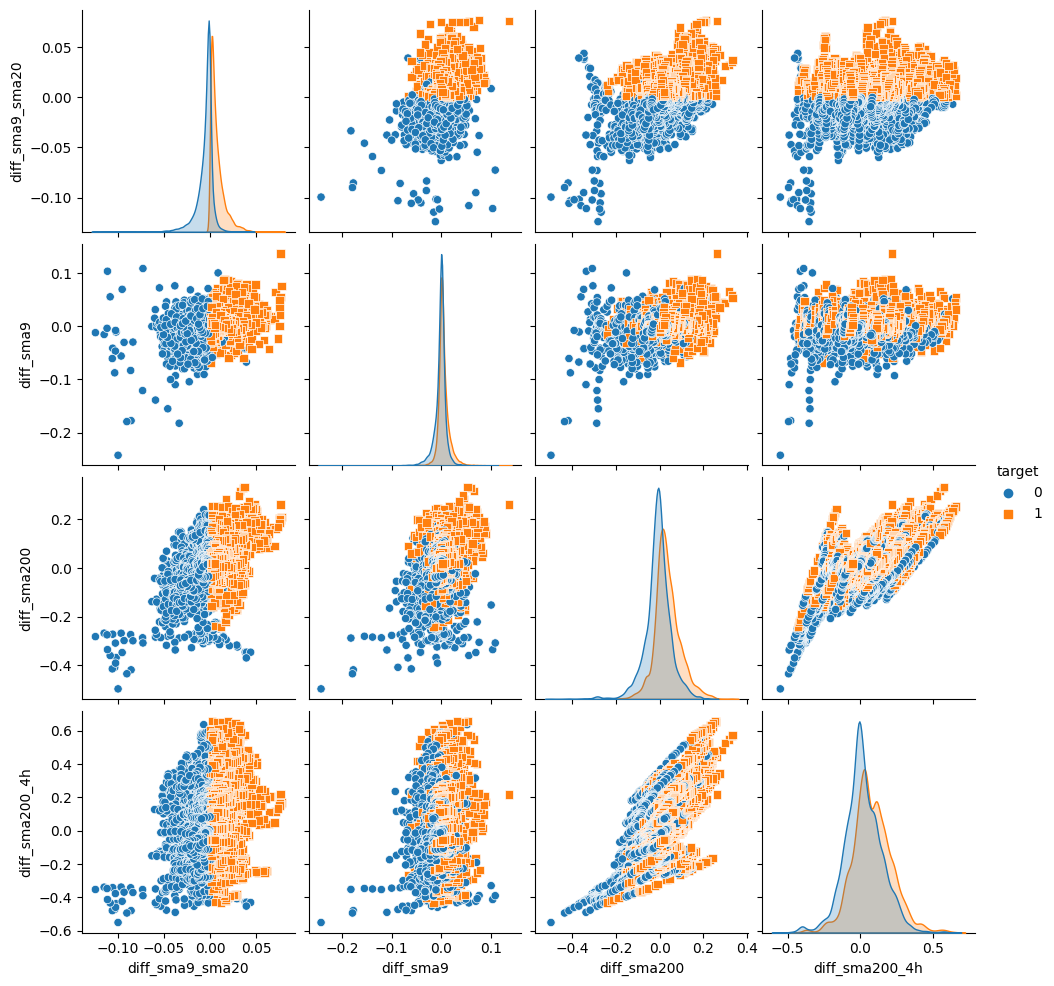

In [18]:
#Visualizing pairplot of features relative to long target
sns.pairplot(plot_df[[ "diff_sma9_sma20", "diff_sma9","diff_sma200", "diff_sma200_4h", "target" ]], diag_kind="kde" ,hue='target' , markers=["o", "s"])

In [19]:
#Divide dataset to train set and validation set for further usage
_from = '2019-01-01 00:00:00'
_to = '2021-01-01 00:00:00'
_prediction_to = '2021-06-01 00:00:00'

train_set = expo.loc[_from:_to,:].copy()
valid_set = expo.loc[_to:_prediction_to,:].copy()

In [20]:
train_set

,close,open,high,low,volume,sma9,sma20,sma200,sma200_4h,diff_sma9,diff_sma20,diff_sma200,diff_sma200_4h,diff_sma9_sma20,target_long,target_short
Date,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,3700.31,3701.23,3713.00,3689.88,686.367415,3703.870000,3730.2370,3788.18005,NaN,-0.000961,-0.008023,-0.023196,NaN,-0.007068,0,0
2019-01-01 01:00:00,3689.69,3700.20,3702.73,3684.22,613.539120,3698.705556,3727.3490,3786.94660,NaN,-0.002437,-0.010103,-0.025682,NaN,-0.007685,0,0
2019-01-01 02:00:00,3690.00,3689.67,3695.95,3675.04,895.302181,3693.560000,3723.9765,3785.63015,NaN,-0.000964,-0.009124,-0.025261,NaN,-0.008168,0,0
2019-01-01 03:00:00,3693.13,3690.00,3699.77,3685.78,796.714817,3688.183333,3720.9105,3784.44710,NaN,0.001341,-0.007466,-0.024130,NaN,-0.008795,0,0
2019-01-01 04:00:00,3692.71,3692.32,3720.00,3685.94,1317.452909,3688.765556,3717.9355,3783.21580,NaN,0.001069,-0.006785,-0.023923,NaN,-0.007846,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 20:00:00,29126.70,28897.84,29139.65,28862.00,1936.480276,28680.828889,28829.6710,26106.94250,21599.92275,0.015546,0.010303,0.115669,0.348463,-0.005163,0,0
2020-12-31 21:00:00,28966.36,29126.71,29169.55,28900.79,2524.473117,28719.580000,28840.8105,26133.68760,21599.92275,0.008593,0.004353,0.108392,0.341040,-0.004203,0,0
2020-12-31 22:00:00,29100.84,28966.36,29143.73,28910.19,1438.506320,28784.228889,28859.8280,26160.39345,21599.92275,0.010999,0.008351,0.112401,0.347266,-0.002620,0,0


In [21]:
valid_set

,close,open,high,low,volume,sma9,sma20,sma200,sma200_4h,diff_sma9,diff_sma20,diff_sma200,diff_sma200_4h,diff_sma9_sma20,target_long,target_short
Date,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,28995.13,28923.63,29031.34,28690.17,2311.811442,28870.590000,28853.1485,26215.70440,21657.24225,0.004314,0.004921,0.106021,0.338819,0.000604,1,0
2021-01-01 01:00:00,29409.99,28995.13,29470.00,28960.35,5403.068447,28984.966667,28875.0380,26244.80740,21657.24225,0.014664,0.018526,0.120602,0.357975,0.003807,1,0
2021-01-01 02:00:00,29194.65,29410.00,29465.26,29120.03,2384.231552,29054.153333,28891.8200,26272.75530,21657.24225,0.004836,0.010482,0.111214,0.348032,0.005619,1,0
2021-01-01 03:00:00,29278.40,29195.25,29367.00,29150.02,1461.345068,29099.281111,28897.9775,26301.36275,21657.24225,0.006155,0.013164,0.113189,0.351899,0.006966,1,0
2021-01-01 04:00:00,29220.31,29278.41,29395.00,29029.40,2038.046776,29135.112222,28912.6775,26329.95435,21714.10715,0.002924,0.010640,0.109774,0.345683,0.007693,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-31 20:00:00,36675.06,36865.75,36980.76,36557.30,1697.834604,36818.311111,36047.6645,36853.66570,47450.29380,-0.003891,0.017405,-0.004846,-0.227085,0.021379,1,0
2021-05-31 21:00:00,36932.55,36677.85,37087.30,36623.01,1483.171068,36835.594444,36154.0725,36870.11810,47450.29380,0.002632,0.021532,0.001693,-0.221658,0.018850,1,0
2021-05-31 22:00:00,36879.23,36932.55,37250.00,36835.85,2322.342409,36853.144444,36262.0340,36885.05470,47450.29380,0.000708,0.017020,-0.000158,-0.222782,0.016301,1,0


In [22]:
#Save csv files for further usage
train_set.to_csv('train.csv', index = True, header=True)
valid_set.to_csv('validation.csv', index = True, header=True)